In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [2]:
HDR_PATH_iphone = '/data/iphone_808080_5_2023-07-24_007/results/REFLECTANCE_iphone_808080_2023-07-24_007.hdr'
HDR_PATH_pixel = '/data/pixel_808080_2023-07-24_009/results/REFLECTANCE_pixel_808080_2023-07-24_009.hdr'
HDR_PATH_huawei = '/data/huawei_808080_2023-07-24_010/results/REFLECTANCE_huawei_808080_2023-07-24_010.hdr'

IMG_PATH_iphone = '/data/iphone_808080_5_2023-07-24_007/results/REFLECTANCE_iphone_808080_2023-07-24_007.png'
IMG_PATH_pixel = '/data/pixel_808080_2023-07-24_009/results/REFLECTANCE_pixel_808080_2023-07-24_009.png'
IMG_PATH_huawei = '/data/huawei_808080_2023-07-24_010/results/REFLECTANCE_huawei_808080_2023-07-24_010.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

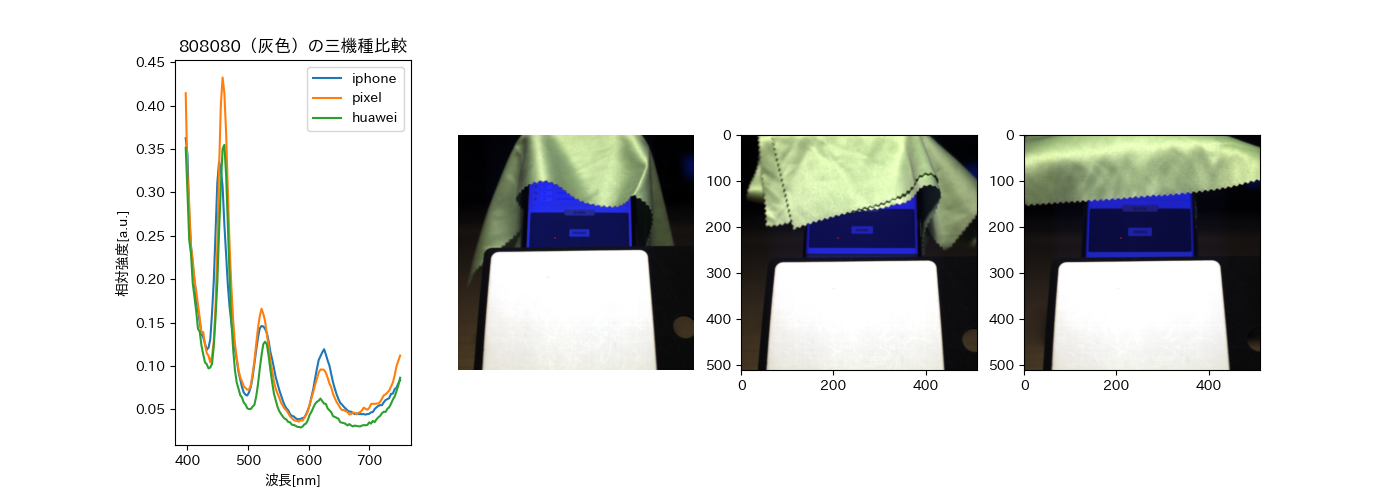

In [5]:
pixel_x = 210 # X座標
pixel_y = 225  # Y座標
color = (255, 0, 0)  # 色(RGB値)

range=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in range:
    for j in range:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in range:
    for j in range:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in range:
    for j in range:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='iphone')
ax1.plot(x,y_p,label='pixel')
ax1.plot(x,y_h,label='huawei')
ax1.set_title('808080（灰色）の三機種比較')
ax1.set_xlabel('波長[nm]')
ax1.set_ylabel('相対強度[a.u.]')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [6]:
rgb = [20,44,78]
for i in rgb:
    print(x[i],y_i[i])

455.16 0.32723948
525.1 0.14558303
625.22 0.119337015


In [7]:
for i in rgb:
    print(x[i],y_p[i])

455.16 0.4004329
525.1 0.1599665
625.22 0.09554974


In [8]:
for i in rgb:
    print(x[i],y_h[i])

455.16 0.306163
525.1 0.12519084
625.22 0.056648776


### ここから青の最大値の波長探し

In [9]:
y_i[18:22]

array([0.31083843, 0.33526012, 0.32723948, 0.3067591 ], dtype=float32)

In [10]:
y_p[18:22]

array([0.23728813, 0.32648402, 0.4004329 , 0.43237704], dtype=float32)

In [11]:
y_h[18:22]

array([0.19555555, 0.25523013, 0.306163  , 0.3502825 ], dtype=float32)

### ここから緑の最大値の波長探し

In [12]:
y_i[42:46]

array([0.14317673, 0.14607558, 0.14558303, 0.14275815], dtype=float32)

In [13]:
y_p[42:46]

array([0.15738285, 0.16595013, 0.1599665 , 0.15176374], dtype=float32)

In [14]:
y_h[42:47]

array([0.09669621, 0.11215686, 0.12519084, 0.12799402, 0.12490869],
      dtype=float32)

In [15]:
y_p[75:80]

array([0.09250814, 0.09589041, 0.09589041, 0.09554974, 0.09210526],
      dtype=float32)

### ここから赤の最大値の波長探し

In [16]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([19, 43, 78]),) (array([ 21,  43, 100]),) (array([22, 45, 76]),)


In [17]:
for elem in ex_max_i[0]:
    print(y_i[elem])

0.33526012
0.14607558
0.119337015


In [18]:
for i in ex_max_p[0]:
    print(y_p[i])

0.43237704
0.16595013
0.052018635


In [19]:
for i in ex_max_h[0]:
    print(y_h[i])

0.35472372
0.12799402
0.062425684
